In [150]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [154]:
def extract_data(df_path, country):
    df = pd.read_csv(df_path)
    df = df[["dateRep", "day", "month", "year", "cases", "countriesAndTerritories"]]
    df = df[df.countriesAndTerritories == country]
    df = df.sort_values(["year", "month","day"])
    df.to_csv(df_path[:-4] + "_" + country.lower() + ".csv", index=False)
extract_data("data/covid/europe_timeseries.csv", "Germany")

def time_interval(df, start, end):
    """
    :param str start: yyyy-mm-dd
    :param str end: yyyy-mm-dd 
    """
    if (start == "start") & (end == "end"):
        df_interval = df
    elif (start == "start"):
        df_interval = df[df.dateRep < end]
    elif (end == "end"):
        df_interval = df[df.dateRep > start]
    else:
        df_interval = df[(start <= df.dateRep) & (df.dateRep <= end)]
    return df_interval[["dateRep","cases","cumCases"]].reset_index(drop=True)

In [152]:
df = pd.read_csv("data/covid/europe_timeseries_germany.csv")
df.dateRep = pd.to_datetime(df.dateRep, format='%d/%m/%Y')
df["cumCases"] = df.cases.cumsum()

Text(0.5, 0.98, 'Interval: 2020 - 2022')

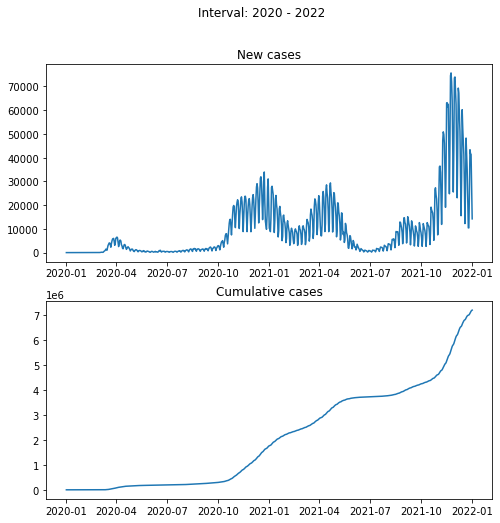

In [143]:
start_time = "2020"
end_time = "2022"
df_interval = time_interval(df, start_time, end_time)
x_axis = df_interval.dateRep
fig, axs = plt.subplots(2, figsize=(8,8))
axs[0].plot(x_axis, df_interval.cases)
axs[0].set_title("New cases")
axs[1].plot(x_axis, df_interval.cumCases)
axs[1].set_title("Cumulative cases")
fig.suptitle(f"Interval: {start_time} - {end_time}")